# Hi :)

----

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# ITG

# Loading the dataset

In [3]:
ITG_features_df= pd.read_csv('Dataset/ITG_features_df.csv')

# RF

In [4]:
# Step 1: Extract features and labels
X= ITG_features_df[['F1_sum_vector_magnitude', 'F2_orientation_angle', 'F3_std_magnitude']].values
y= ITG_features_df['Situation'].values

# Step 2: Encode labels ('Fall' → 1, 'Not Fall' → 0)
label_encoder= LabelEncoder()
y_encoded= label_encoder.fit_transform(y)

# Step 3: Split dataset
X_train, X_test, y_train, y_test= train_test_split(X, y_encoded, test_size= 0.2, random_state= 48, stratify= y_encoded)

In [5]:
# Hyperparameter tuning
param_grid= {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

rf= RandomForestClassifier(random_state= 48)
grid_search= GridSearchCV(rf, param_grid, cv= 5, scoring= 'accuracy', n_jobs= -1, verbose= 1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters Found:")
print(grid_search.best_params_)

# Best estimator
best_rf= grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters Found:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters Found:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

In [6]:
# Step 4: Train RF
rf= RandomForestClassifier(
    n_estimators= 100,
    max_depth= 10,
    min_samples_split= 5,
    min_samples_leaf= 1,
    random_state= 48
)

# Fit on training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=48)

In [7]:
# Step 5: Evaluation
y_pred= rf.predict(X_test)
acc= accuracy_score(y_test, y_pred)

Accuracy: 0.6807

Classification Report:
              precision    recall  f1-score   support

        Fall       0.66      0.74      0.70      2097
    Not Fall       0.70      0.63      0.66      2097

    accuracy                           0.68      4194
   macro avg       0.68      0.68      0.68      4194
weighted avg       0.68      0.68      0.68      4194



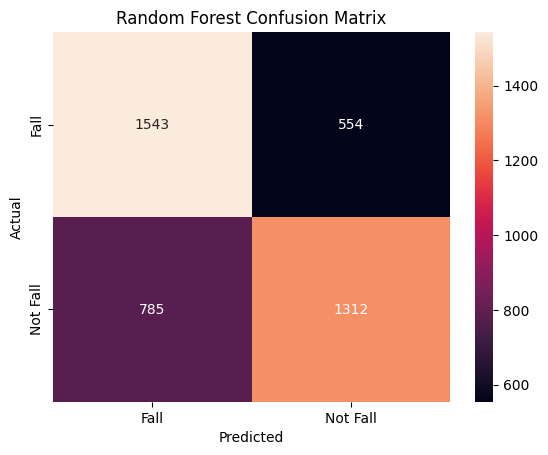

In [8]:
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= label_encoder.classes_))

# Confusion matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= 'd', xticklabels= label_encoder.classes_, yticklabels= label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving the model

In [9]:
# Save model
joblib.dump(rf, 'Models/RF/SingleSensor/RF.pkl')

# # Save scaler if used
# joblib.dump(scaler, 'Models/RF/SingleSensor/Scaler.pkl')

# Save encoder once and reuse
joblib.dump(label_encoder, 'Models/RF/SingleSensor/LabelEncoder.pkl')

['Models/RF/SingleSensor/LabelEncoder.pkl']

----

# Data Fusion

# Loading the dataset

In [10]:
KF_features_df= pd.read_csv('Dataset/KF_features_df.csv')

# KF

In [11]:
# Step 1: Extract features and labels
X= KF_features_df[['F1_sum_vector_magnitude', 'F2_orientation_angle', 'F3_std_magnitude']].values
y= KF_features_df['Situation'].values

# Step 2: Encode labels ('Fall' → 1, 'Not Fall' → 0)
label_encoder= LabelEncoder()
y_encoded= label_encoder.fit_transform(y)

# Step 3: Split dataset
X_train, X_test, y_train, y_test= train_test_split(X, y_encoded, test_size= 0.2, random_state= 48, stratify= y_encoded)

In [12]:
# Hyperparameter tuning
param_grid= {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

rf= RandomForestClassifier(random_state= 48)
grid_search= GridSearchCV(rf, param_grid, cv= 5, scoring= 'accuracy', n_jobs= -1, verbose= 1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters Found:")
print(grid_search.best_params_)

# Best estimator
best_rf= grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters Found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters Found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

In [13]:
# Step 4: Train RF
rf= RandomForestClassifier(
    n_estimators= 200,
    max_depth= 20,
    min_samples_split= 5,
    min_samples_leaf= 1,
    random_state= 48
)

# Fit on training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=48)

In [14]:
# Step 5: Evaluation
y_pred= rf.predict(X_test)
acc= accuracy_score(y_test, y_pred)

Accuracy: 0.8019

Classification Report:
              precision    recall  f1-score   support

        Fall       0.83      0.77      0.79      2097
    Not Fall       0.78      0.84      0.81      2097

    accuracy                           0.80      4194
   macro avg       0.80      0.80      0.80      4194
weighted avg       0.80      0.80      0.80      4194



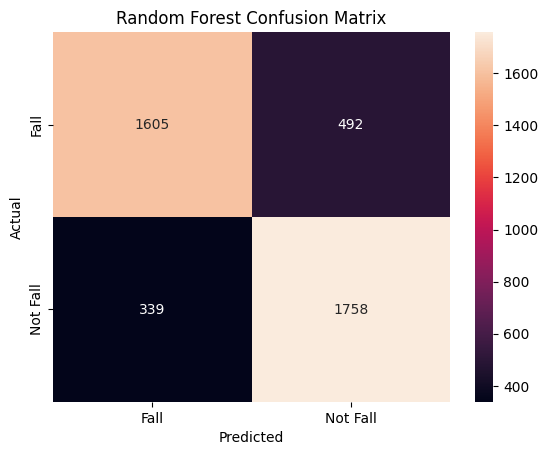

In [15]:
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= label_encoder.classes_))

# Confusion matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= 'd', xticklabels= label_encoder.classes_, yticklabels= label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving the model

In [16]:
# Save model
joblib.dump(rf, 'Models/RF/DataFusion/RF.pkl')

# # Save scaler if used
# joblib.dump(scaler, 'Models/RF/DataFusion/Scaler.pkl')

# Save encoder once and reuse
joblib.dump(label_encoder, 'Models/RF/DataFusion/LabelEncoder.pkl')

['Models/RF/DataFusion/LabelEncoder.pkl']